In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from hotelling.plots import control_chart, control_stats, univariate_control_chart
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt
from pandas.testing import assert_series_equal, assert_frame_equal
from hotelling.stats import hotelling_t2
import matplotlib as mpl
import prince
from helper import print_question, data_frame_to_latex_table_file
#from tsquared import HotellingT2
sc = StandardScaler()

In [2]:
def biplot(PCA, PCB, scalePCA, scalePCB, ldngs, features, label, text=False):

    fig, ax = plt.subplots(figsize=(14, 9))
 
    for i, feature in enumerate(features):
        ax.arrow(0, 0, ldngs[0, i], 
                 ldngs[1, i])
        ax.text(ldngs[0, i] * 1.15, 
                ldngs[1, i] * 1.15, 
                feature, fontsize=12)
        if text == True:
            for i, lbl in enumerate(PC_scores.index):
                ax.text(PCA[i] * scalePCA, 
                        PCB[i] * scalePCB, str(lbl), 
                        fontsize=10)
    ax.set_xlabel(label[0], fontsize=14)
    ax.set_ylabel(label[1], fontsize=14)
 
    ax.scatter(PCA * scalePCA,PCB * scalePCB)

In [3]:
# for the figures
figure_dir = '../figures/'
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)
# for the latex document
report_dir = '../report/'
if not os.path.exists(report_dir):
    os.makedirs(report_dir)
    
fignum = 0

# Preparing the dataset

In [4]:
df = pd.read_csv("DataDepenses.csv",header=1, sep=";")
df.head()
df.shape
X = df.iloc[:, 1:12]

n, p = X.shape
print("\nNous ont n = {} observations sur p = {} variables.".format(n, p))


Nous ont n = 24 observations sur p = 11 variables.


In [5]:
X

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ACO,DEF,DET,DIV
0,18.0,0.5,0.1,6.7,0.5,2.1,2.0,0.0,26.4,41.5,2.1
1,14.1,0.8,0.1,15.3,1.9,3.7,0.5,0.0,29.8,31.3,2.5
2,13.6,0.7,0.7,6.8,0.6,7.1,0.7,0.0,33.8,34.4,1.7
3,14.3,1.7,1.7,6.9,1.2,7.4,0.8,0.0,37.7,26.2,2.2
4,10.3,1.5,0.4,9.3,0.6,8.5,0.9,0.0,38.4,27.2,3.0
5,13.4,1.4,0.5,8.1,0.7,8.6,1.8,0.0,38.5,25.3,1.9
6,13.5,1.1,0.5,9.0,0.6,9.0,3.4,0.0,36.8,23.5,2.6
7,12.9,1.4,0.3,9.4,0.6,9.3,4.3,0.0,41.1,19.4,1.3
8,12.3,0.3,0.1,11.9,2.4,3.7,1.7,1.9,42.4,23.1,0.2
9,7.6,1.2,3.2,5.1,0.6,5.6,1.8,10.0,29.0,35.0,0.9


In [6]:
X_bar, S = control_stats(X)
X_bar.head()

PVP    12.212500
AGR     1.995833
CMI     3.937500
TRA     8.320833
LOG     3.958333
dtype: float64

In [7]:
print("\n\nObservons que la somme des toutes valeurs est bien {}. \nAlors ces sont bien des pourcentages.".format(np.sum(X_bar)))



Observons que la somme des toutes valeurs est bien 100.04166666666667. 
Alors ces sont bien des pourcentages.


In [8]:
summary_stats = X.describe()
summary_stats = summary_stats.T
summary_stats

,count,mean,std,min,25%,50%,75%,max
PVP,24.0,12.212500,2.238267,7.6,10.575,12.60,13.425,18.0
AGR,24.0,1.995833,1.681221,0.3,0.800,1.40,2.650,6.0
CMI,24.0,3.937500,4.579806,0.1,0.400,1.30,7.350,16.5
TRA,24.0,8.320833,2.520866,4.5,6.675,8.00,9.150,15.3
LOG,24.0,3.958333,4.271841,0.5,0.675,1.85,6.200,15.8
EDU,24.0,9.941667,5.335600,2.1,7.325,8.70,10.600,23.8
ACS,24.0,4.816667,3.482087,0.5,1.800,4.55,6.800,11.3
ACO,24.0,4.275000,4.244203,0.0,0.000,3.80,5.450,13.4
DEF,24.0,30.258333,7.466733,18.8,25.925,29.15,37.025,42.4
DET,24.0,19.141667,12.455972,3.5,6.350,19.30,26.450,41.6


In [10]:
data_frame_to_latex_table_file(report_dir + 'summary_stats.tex', summary_stats)

# Variance

Here, we calculate the covariance matrix for our dataset. By making a headmap of the variance we see that a that a lot of the variance in the dataset is concentrated on the DET component. This might be an issue when we perform our PCA analysis. Due to uneven variation in the data, it might be more desireable to perform a PCA on the correlation matrix. 

In [11]:
# Estimateur non-biasé pour la matrice de variance-covariance de X: 

X_cent = X - X_bar                   # centrer les données
S_hat = 1/(n-1)*X_cent.T@X_cent      
#print(S_hat.head()[["PVP", "AGR", "CMI", "TRA", "LOG"]])

In [12]:
# Pour comparer, on peut montrer aussi la variance calculé par control_stats (hotelling.plots package):  
S.style.background_gradient(cmap='coolwarm')

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ACO,DEF,DET,DIV
PVP,5.009837,-0.318207,-0.018750,1.313207,0.340543,-1.791848,-1.024130,-6.525326,1.688804,0.935543,0.350217
AGR,-0.318207,2.826504,4.628424,-1.169040,3.129384,6.560181,4.716594,0.315978,-5.628442,-14.552428,-0.488333
CMI,-0.018750,4.628424,20.974620,1.061359,17.438587,11.432283,9.918913,0.441848,-18.372717,-45.871630,-1.667174
TRA,1.313207,-1.169040,1.061359,6.354764,1.788732,-2.866993,-1.782536,-3.351196,2.973514,-4.657862,0.302101
LOG,0.340543,3.129384,17.438587,1.788732,18.248623,5.296159,7.255507,0.810652,-12.074855,-40.335145,-1.960290
EDU,-1.791848,6.560181,11.432283,-2.866993,5.296159,28.468623,16.256232,3.554565,-20.878188,-44.544855,-1.390145
ACS,-1.024130,4.716594,9.918913,-1.782536,7.255507,16.256232,12.124928,4.259130,-14.745797,-35.053768,-1.932319
ACO,-6.525326,0.315978,0.441848,-3.351196,0.810652,3.554565,4.259130,18.013261,-13.210217,-2.609783,-1.678696
DEF,1.688804,-5.628442,-18.372717,2.973514,-12.074855,-20.878188,-14.745797,-13.210217,55.752101,24.333551,0.159710
DET,0.935543,-14.552428,-45.871630,-4.657862,-40.335145,-44.544855,-35.053768,-2.609783,24.333551,155.151232,7.229855


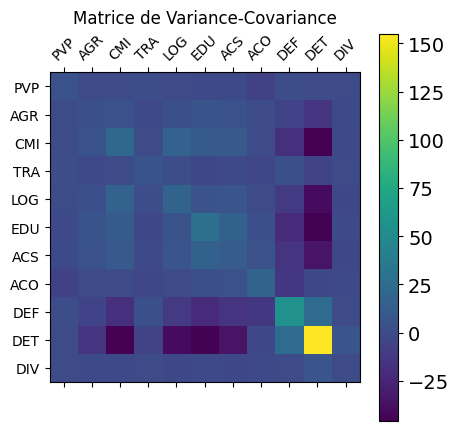

In [13]:
f = plt.figure(figsize=(5, 5))
plt.matshow(S_hat, fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matrice de Variance-Covariance', fontsize=12);
plt.savefig(figure_dir + 'figure_{}.png'.format(fignum))
fignum = fignum+1
plt.show()

# Correlation
As the last image showed, it's difficult to even see with the covariance matrix how data might be related due to the high amount of variability concentrated in the DET component. Due to this, the correlation matrix might carry more helpful information, due to the fact that it scales all components. From this correlation matrix, we have much richer information: We still see how DET is negative correlated with many other variables. However, we have better appreciation between the relations between these other variables. 

We can see 5 variables more or less positively correlated among them one one side: AGR, CMI, LOG, EDU, ACS.
And on the other side, 2 other variables positively correlated among them: DET, DIV.
These two groups are negatively correlated with eachother. 

PVP, ACO and TRA seem kind of isolated, with PVP and ACO being strongly negatively correlated with eachother. Finally, DEF is isolated as well, but has correlated negatively with the group of five variables.

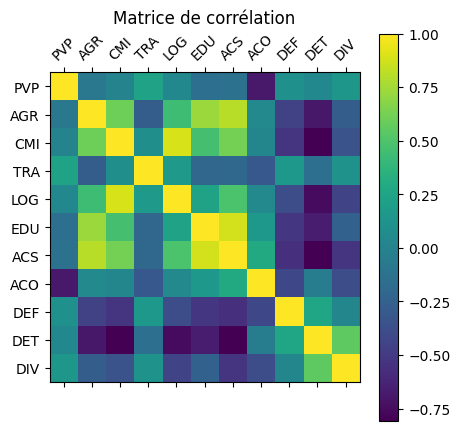

In [14]:
f = plt.figure(figsize=(5, 5))
plt.matshow(X.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Matrice de corrélation', fontsize=12);
plt.savefig(figure_dir + 'figure_{}.png'.format(fignum))
fignum = fignum+1
plt.show()

In [15]:
# Calculating the correlation numerically: 

dim = len(S_hat)
diag = np.diagonal(S_hat)

ones = np.ones((dim, dim))
column_ones = ones * np.sqrt(diag)
line_ones = column_ones.T

denominator = column_ones * line_ones

rho = S_hat/denominator
rho.head()

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ACO,DEF,DET,DIV
PVP,1.000000,-0.084561,-0.001829,0.232740,0.035616,-0.150040,-0.131403,-0.686901,0.101050,0.033556,0.149324
AGR,-0.084561,1.000000,0.601120,-0.275838,0.435732,0.731321,0.805683,0.044283,-0.448366,-0.694917,-0.277202
CMI,-0.001829,0.601120,1.000000,0.091932,0.891352,0.467846,0.621981,0.022732,-0.537274,-0.804118,-0.347407
TRA,0.232740,-0.275838,0.091932,1.000000,0.166104,-0.213154,-0.203072,-0.313223,0.157975,-0.148340,0.114369
LOG,0.035616,0.435732,0.891352,0.166104,1.000000,0.232361,0.487768,0.044712,-0.378561,-0.758038,-0.437935


In [16]:
# Pour mieux interpreter la dépendance linéaire, privilégier la matrice de correlation:

corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ACO,DEF,DET,DIV
PVP,1.000000,-0.084561,-0.001829,0.232740,0.035616,-0.150040,-0.131403,-0.686901,0.101050,0.033556,0.149324
AGR,-0.084561,1.000000,0.601120,-0.275838,0.435732,0.731321,0.805683,0.044283,-0.448366,-0.694917,-0.277202
CMI,-0.001829,0.601120,1.000000,0.091932,0.891352,0.467846,0.621981,0.022732,-0.537274,-0.804118,-0.347407
TRA,0.232740,-0.275838,0.091932,1.000000,0.166104,-0.213154,-0.203072,-0.313223,0.157975,-0.148340,0.114369
LOG,0.035616,0.435732,0.891352,0.166104,1.000000,0.232361,0.487768,0.044712,-0.378561,-0.758038,-0.437935
EDU,-0.150040,0.731321,0.467846,-0.213154,0.232361,1.000000,0.874978,0.156967,-0.524058,-0.670250,-0.248646
ACS,-0.131403,0.805683,0.621981,-0.203072,0.487768,0.874978,1.000000,0.288194,-0.567150,-0.808198,-0.529595
ACO,-0.686901,0.044283,0.022732,-0.313223,0.044712,0.156967,0.288194,1.000000,-0.416853,-0.049366,-0.377468
DEF,0.101050,-0.448366,-0.537274,0.157975,-0.378561,-0.524058,-0.567150,-0.416853,1.000000,0.261636,0.020413
DET,0.033556,-0.694917,-0.804118,-0.148340,-0.758038,-0.670250,-0.808198,-0.049366,0.261636,1.000000,0.553932


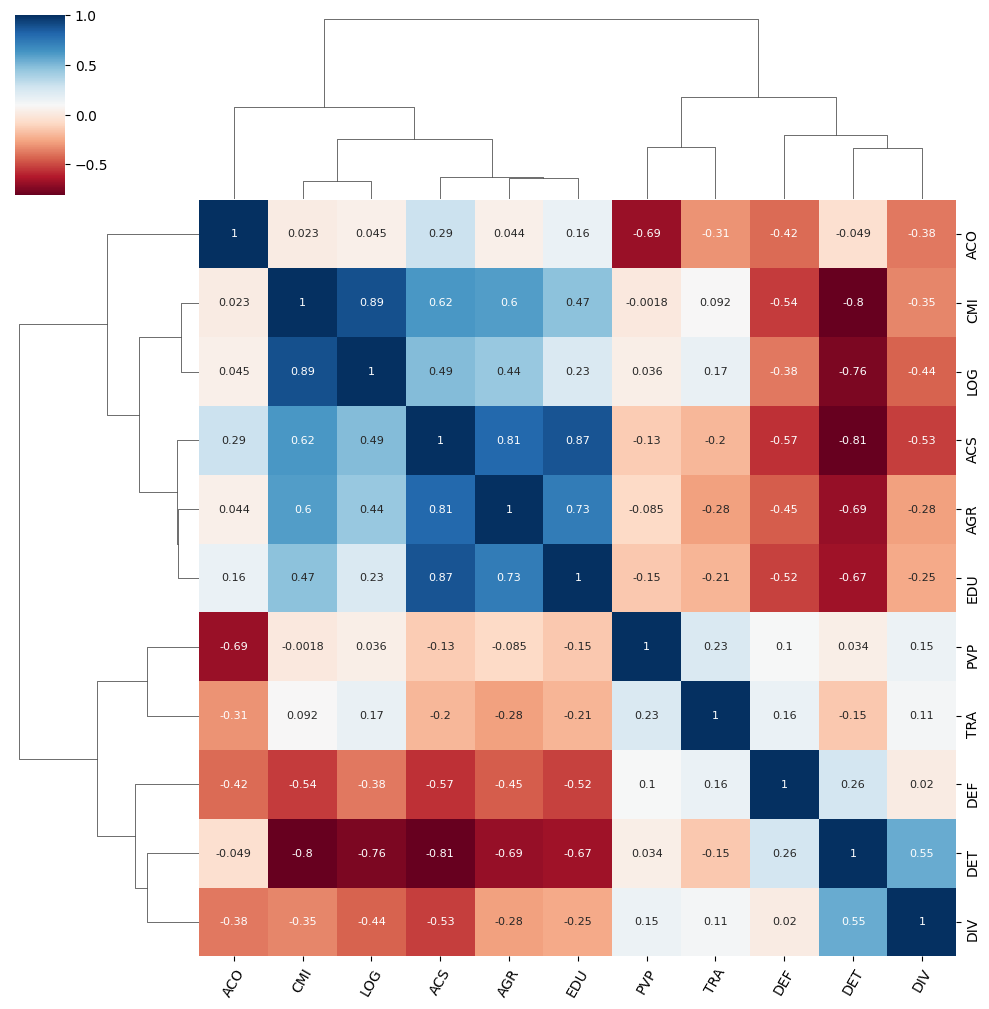

In [17]:
g = sns.clustermap(X.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

plt.savefig(figure_dir + 'figure_{}.png'.format(fignum))
fignum = fignum+1

plt.show()


# ACP avec la matrice de Covariance 


In [18]:
# rescale_with_std = False

ppca = prince.PCA(n_components=7, n_iter=3,rescale_with_mean=True,
rescale_with_std=False,copy=True,check_input=True, random_state=42)
#engine='auto'
ppca = ppca.fit(X)
#help(pca)

In [19]:
ppca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,204.686,65.92%,65.92%
1,55.825,17.98%,83.89%
2,21.953,7.07%,90.96%
3,16.402,5.28%,96.25%
4,5.526,1.78%,98.03%
5,3.083,0.99%,99.02%
6,1.110,0.36%,99.38%


In [20]:
ppca.total_inertia_    # == np.sum(ppca.eigenvalues_) if n_components is maximum

310.52152777777775

In [21]:
ppca.scree_plot()

alt.Chart(...)

In [22]:
ax = ppca.plot(X)
ax

alt.LayerChart(...)

# ACP avec la matrice de Correlation


In [23]:
# rescale_with_std = True

ppca = prince.PCA(n_components=10, n_iter=3,rescale_with_mean=True,
rescale_with_std=True,copy=True,check_input=True, random_state=42)
#engine='auto'
ppca = ppca.fit(X)

In [24]:
eigenvalues_summary = ppca.eigenvalues_summary
eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,4.973,45.21%,45.21%
1,2.050,18.64%,63.85%
2,1.290,11.73%,75.57%
3,0.993,9.03%,84.61%
4,0.708,6.44%,91.04%
5,0.559,5.08%,96.12%
6,0.204,1.86%,97.98%
7,0.125,1.14%,99.12%
8,0.062,0.56%,99.68%


In [27]:
data_frame_to_latex_table_file(report_dir + 'eigenvalues_summary.tex', eigenvalues_summary)

In [28]:
ppca.total_inertia_    # == np.sum(ppca.eigenvalues_) if n_components is maximum
ppca.percentage_of_variance_

array([45.21241464, 18.63577931, 11.72657906,  9.03030181,  6.43897368,
        5.07876175,  1.85667949,  1.13905924,  0.56302059,  0.31839085])

In [29]:
# Save this figure as 'figure_scree_plot.png' in the Figures folder of the assignment.

ppca.scree_plot()

alt.Chart(...)

In [30]:
ax = ppca.plot(X)
ax

alt.LayerChart(...)

In [31]:
np.sum(ppca.column_correlations**2, 1)
PCA_corr = ppca.column_correlations.iloc[:,0:4]
PCA_corr

component,0,1,2,3
variable,,,,
PVP,-0.173578,-0.739763,0.341469,-0.107558
AGR,0.818517,-0.005918,0.366433,-0.153632
CMI,0.833594,-0.340222,-0.140809,0.258018
TRA,-0.137166,-0.630559,-0.376015,0.281110
LOG,0.721613,-0.397716,-0.385161,0.207956
EDU,0.786829,0.136504,0.424637,-0.115890
ACS,0.933259,0.100484,0.166134,-0.150740
ACO,0.288961,0.807563,-0.374504,0.202154
DEF,-0.612343,-0.216146,-0.259903,-0.636766


In [35]:
data_frame_to_latex_table_file(report_dir + 'PCA_corr.tex', PCA_corr)

In [36]:
sc.fit(X)
X_scaled = sc.transform(X)

pd.DataFrame(X_scaled, columns=X.columns)

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ACO,DEF,DET,DIV
0,2.641319,-0.908867,-0.855939,-0.656796,-0.826977,-1.501298,-0.826300,-1.028920,-0.527850,1.833595,0.893630
1,0.861424,-0.726587,-0.855939,2.828105,-0.492201,-1.194976,-1.266341,-1.028920,-0.062704,0.997099,1.283578
2,0.633232,-0.787347,-0.722112,-0.616274,-0.803065,-0.544041,-1.207669,-1.028920,0.484528,1.251328,0.503682
3,0.952700,-0.179748,-0.499066,-0.575752,-0.659589,-0.486606,-1.178333,-1.028920,1.018079,0.578850,0.991117
4,-0.872833,-0.301268,-0.789026,0.396779,-0.803065,-0.276009,-1.148997,-1.028920,1.113844,0.660860,1.771012
5,0.541955,-0.362028,-0.766721,-0.089486,-0.779152,-0.256864,-0.884972,-1.028920,1.127525,0.505042,0.698656
6,0.587594,-0.544307,-0.766721,0.275213,-0.803065,-0.180283,-0.415595,-1.028920,0.894951,0.357425,1.381064
7,0.313764,-0.362028,-0.811330,0.437301,-0.803065,-0.122848,-0.151570,-1.028920,1.483225,0.021186,0.113735
8,0.039934,-1.030386,-0.855939,1.450354,-0.372638,-1.194976,-0.914308,-0.571622,1.661076,0.324621,-0.958621
9,-2.105069,-0.483547,-0.164497,-1.305149,-0.803065,-0.831218,-0.884972,1.377911,-0.172150,1.300534,-0.276213


In [37]:
# Here we revisit each observation for the principal components which were kept. 
# It's interesting to notice the linear trend across PC 1. It increases in the long
# term.

pca = PCA(n_components=3)
PC_scores = pd.DataFrame(pca.fit_transform(X_scaled),
               columns = ['PC 1', 'PC 2', 'PC 3'])
PC_scores

,PC 1,PC 2,PC 3
0,-2.900539,-1.024429,1.564588
1,-2.767389,-2.011953,-0.169510
2,-2.416316,-0.224014,0.765716
3,-2.056634,-0.755155,1.006817
4,-2.337858,-0.167246,0.622559
5,-1.985142,-0.626137,0.692399
6,-1.907355,-0.812222,0.986687
7,-1.431071,-0.768419,0.194171
8,-2.139175,-0.955910,-1.747200
9,-1.142910,2.883950,-0.865633


In [39]:
data_frame_to_latex_table_file(report_dir + 'PC_scores.tex', PC_scores)

In [40]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], 
                        index=X.columns)

In [41]:
PC1 = pca.fit_transform(X_scaled)[:,0]
PC2 = pca.fit_transform(X_scaled)[:,1]
PC3 = pca.fit_transform(X_scaled)[:,2]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
scalePC3 = 1.0/(PC3.max() - PC3.min())
features = X.columns
label = loadings.columns[0:3]

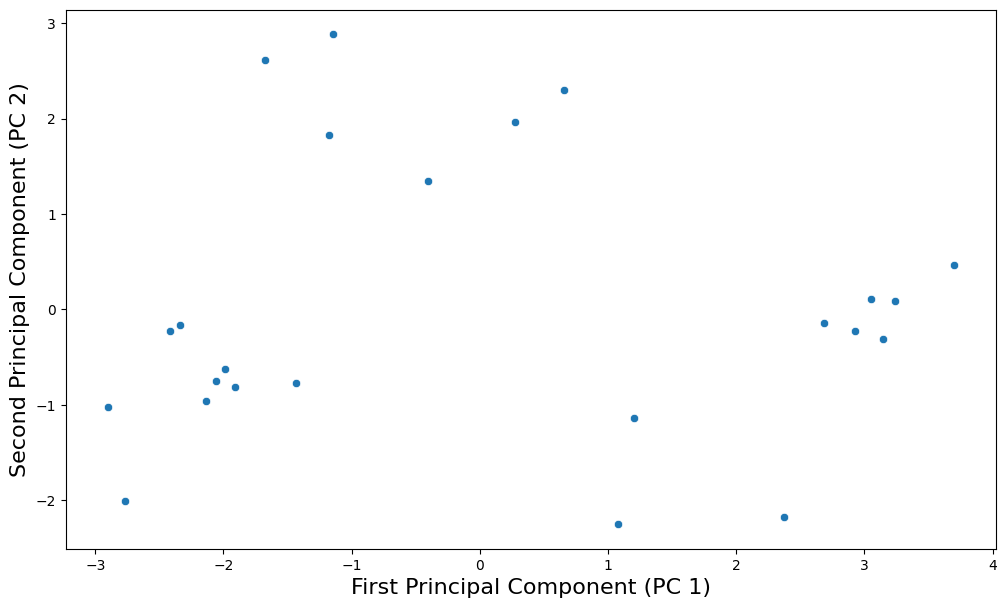

In [42]:
plt.figure(figsize=(12,7))
 
sns.scatterplot(data=PC_scores,
                x="PC 1", 
                y="PC 2")
 
plt.xlabel('First Principal Component (PC 1)',
           fontsize=16)
plt.ylabel('Second Principal Component (PC 2)',
           fontsize=16)
plt.savefig(figure_dir + 'figure_scatterplot_1.png'.format(fignum))

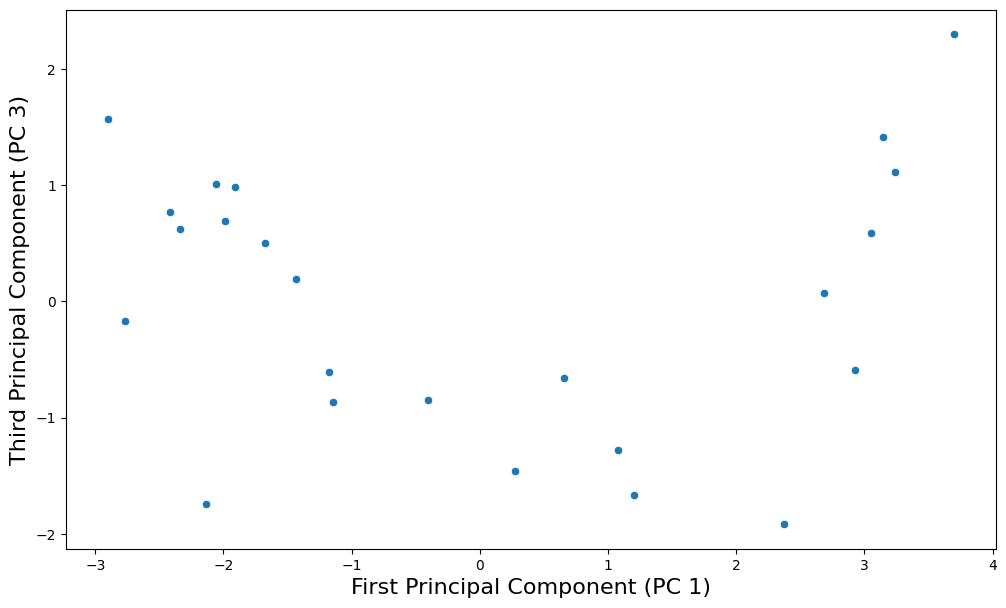

In [43]:
plt.figure(figsize=(12,7))
 
sns.scatterplot(data=PC_scores,
                x="PC 1", 
                y="PC 3")
 
plt.xlabel('First Principal Component (PC 1)',
           fontsize=16)
plt.ylabel('Third Principal Component (PC 3)',
           fontsize=16)
plt.savefig(figure_dir + 'figure_scatterplot_2.png'.format(fignum))

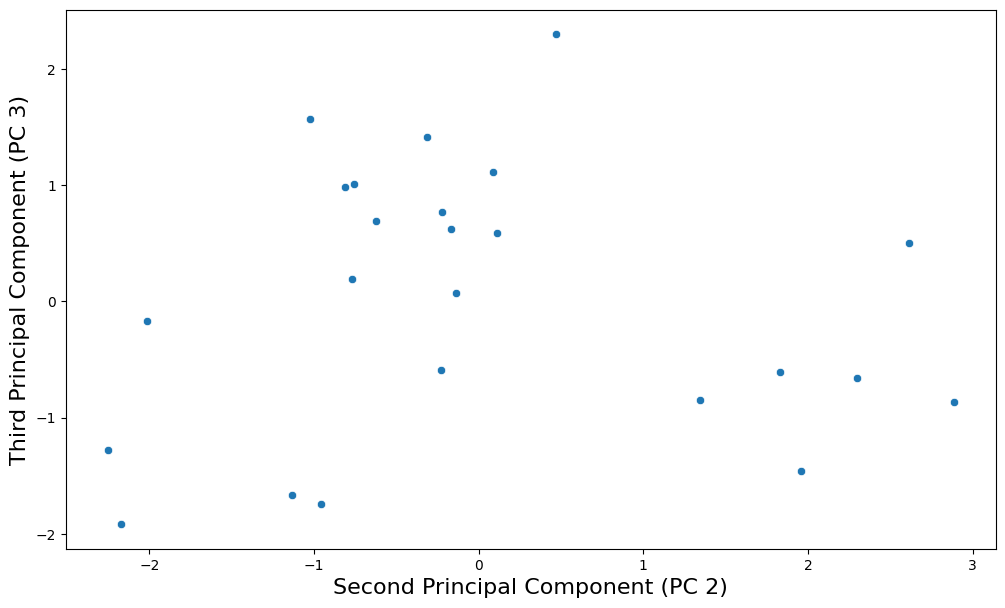

In [44]:
plt.figure(figsize=(12,7))
 
sns.scatterplot(data=PC_scores,
                x="PC 2", 
                y="PC 3")
 
plt.xlabel('Second Principal Component (PC 2)',
           fontsize=16)
plt.ylabel('Third Principal Component (PC 3)',
           fontsize=16)
plt.savefig(figure_dir + 'figure_scatterplot_3.png'.format(fignum))

<Figure size 640x480 with 0 Axes>

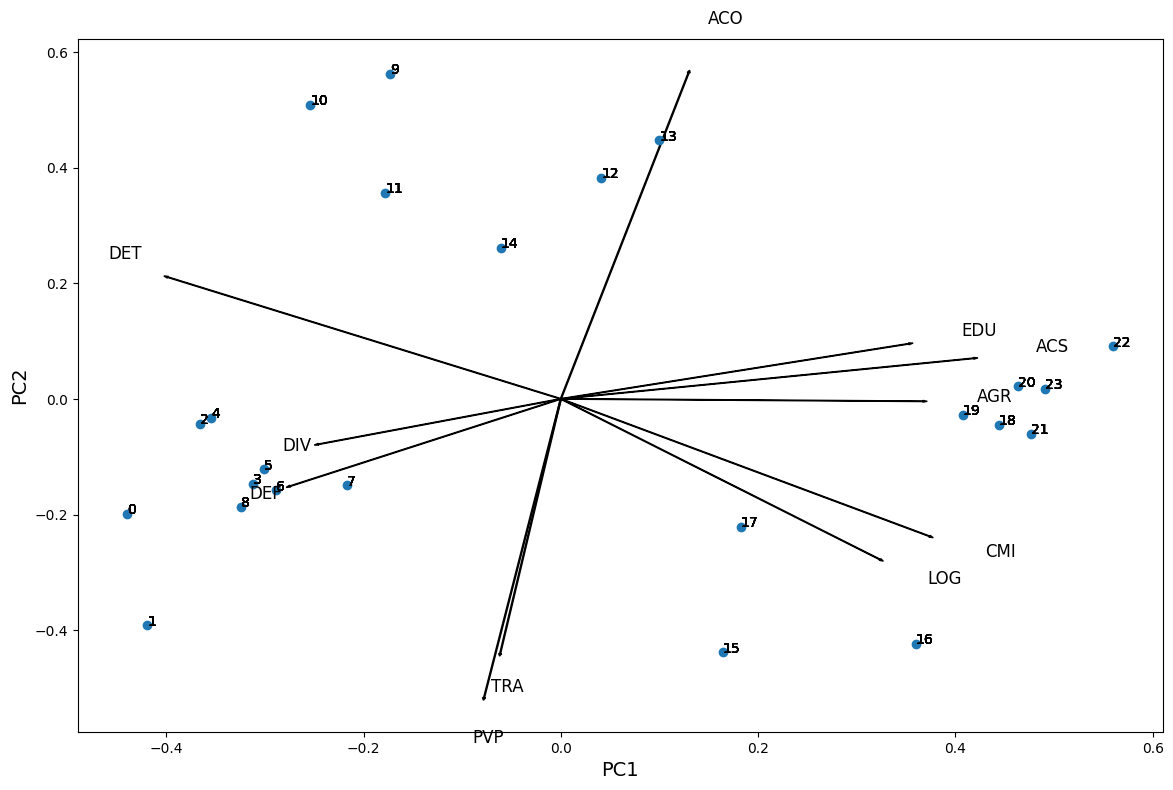

<Figure size 640x480 with 0 Axes>

In [45]:
biplot(PC1, PC2, scalePC1, scalePC2, ldngs[0:2], features, label[0:2], text=True)

plt.savefig(figure_dir + 'figure_{}.png'.format(fignum))
fignum = fignum+1
plt.figure()

<Figure size 640x480 with 0 Axes>

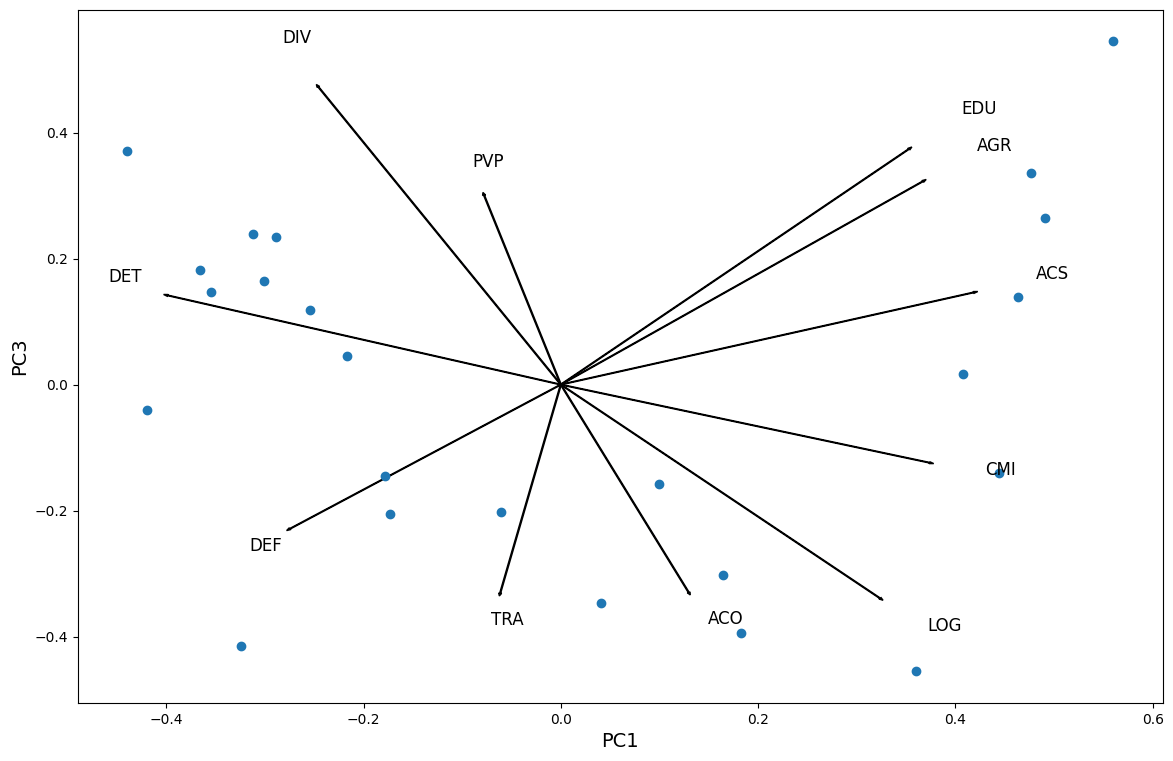

<Figure size 640x480 with 0 Axes>

In [46]:
biplot(PC1, PC3, scalePC1, scalePC3, ldngs[0:3:2], features, label[0:3:2], text=False)

plt.savefig(figure_dir + 'figure_{}.png'.format(fignum))
fignum = fignum+1
plt.figure()

<Figure size 640x480 with 0 Axes>

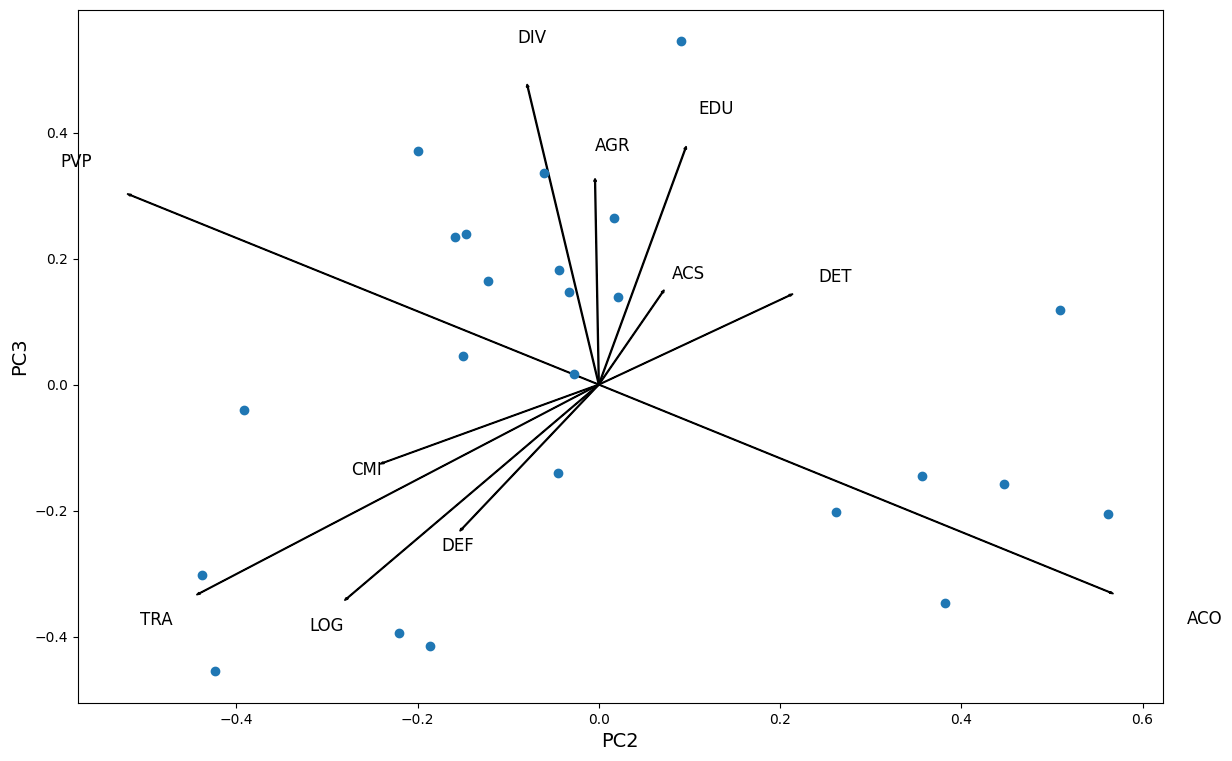

<Figure size 640x480 with 0 Axes>

In [47]:
biplot(PC2, PC3, scalePC2, scalePC3, ldngs[1:3], features, label[1:3])

plt.savefig(figure_dir + 'figure_{}.png'.format(fignum))
fignum = fignum+1
plt.figure()

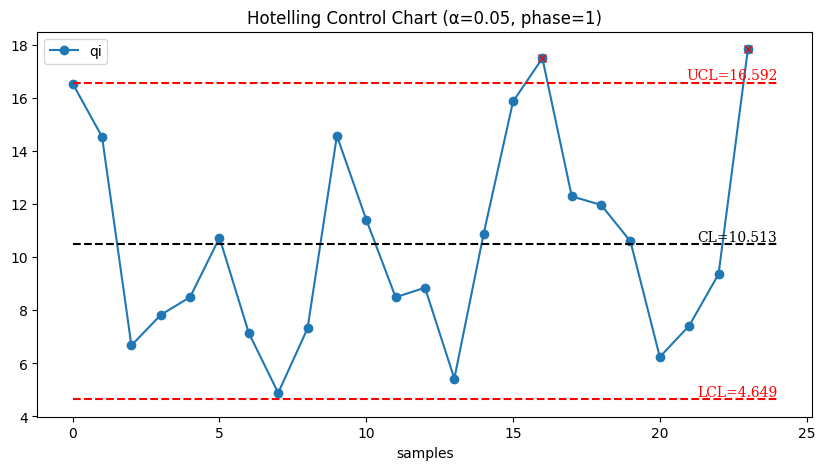

In [48]:
# intervalle de confiance basé sur la statistique de Hotelling
ax = control_chart(X, alpha=0.05, legend_right=True);

plt.savefig(figure_dir + 'figure_{}.png'.format(fignum))
fignum = fignum+1
plt.show()

# End

In [39]:
#help(prince.pca)

In [40]:
#help(PCA)